[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/022_matplotlib/matplotlib.ipynb)

# Matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Seguimos nuestro viaje en la exploración de las librerías para `análisis de datos` que el ecosistema de `Python` nos ofrece. Hasta ahora hemos visto cómo empezar a trabajar con [Python](https://sensioai.com/blog/001_python) y las librerías de [Numpy](https://sensioai.com/blog/007_numpy) y [Pandas](https://sensioai.com/blog/019_pandas). A esta lista agregamos la librería de visualización [Matplotlib](https://matplotlib.org/), la cual exploramos en detalle en este post y que nos va a permitir crear gráficos de calidad que podemos usar para comunicar nuestros descubrimientos, hipótesis y conclusiones.

Para empezar a trabajar con `Matplotlib`, tenemos que importarlo.

> 💡 Puedes instalar la librería con el comando `pip install matplotlib` o `conda install matplotlib` dependiendo de tu instalación de `Python`.

Al usar `Matplotlib` en la línea de comandos  o en un *script* de `Python`, las gráficas nos aparecerán en una ventana separada. Sin embargo, al trabajar con *notebooks*, podemos visualizar nuestros gráficos directamente en el documento (lo cual es ideal a la hora de generar informes con código y visualizaciones en un solo documento). Ésto lo indicamos con el siguiente comando.

In [32]:
# Red de Transporte – Dijkstra, Ford–Fulkerson, Prim
import networkx as nx
import matplotlib.pyplot as plt

# Matriz de costos (grafo no dirigido)
costos = [
    [0, 4, 0, 0, 0, 10],
    [4, 0, 3, 0, 0, 0],
    [0, 3, 0, 2, 0, 0],
    [0, 0, 2, 0, 5, 0],
    [0, 0, 0, 5, 0, 8],
    [10, 0, 0, 0, 8, 0]
]

# Matriz de capacidades (grafo dirigido)
capacidades = [
    [0, 20, 0, 0, 0, 10],
    [0, 0, 15, 0, 0, 0],
    [0, 0, 0, 10, 0, 0],
    [0, 0, 0, 0, 25, 0],
    [0, 0, 0, 0, 0, 8],
    [0, 0, 5, 0, 8, 0]
]

# Grafo no dirigido (costos)
G = nx.Graph()
n = len(costos)
for i in range(n):
    for j in range(i + 1, n):
        if costos[i][j] != 0:
            G.add_edge(i, j, weight=costos[i][j])

# Grafo dirigido (capacidades)
Gf = nx.DiGraph()
for i in range(n):
    for j in range(n):
        if capacidades[i][j] > 0:
            Gf.add_edge(i, j, capacity=capacidades[i][j])

# Dijkstra
origen, destino = 0, 4
camino = nx.dijkstra_path(G, source=origen, target=destino, weight='weight')
distancia = nx.dijkstra_path_length(G, source=origen, target=destino, weight='weight')

# Ford–Fulkerson
flujo_valor, flujo_dict = nx.maximum_flow(Gf, 0, 4)

# Prim
mst = nx.minimum_spanning_tree(G, algorithm='prim')

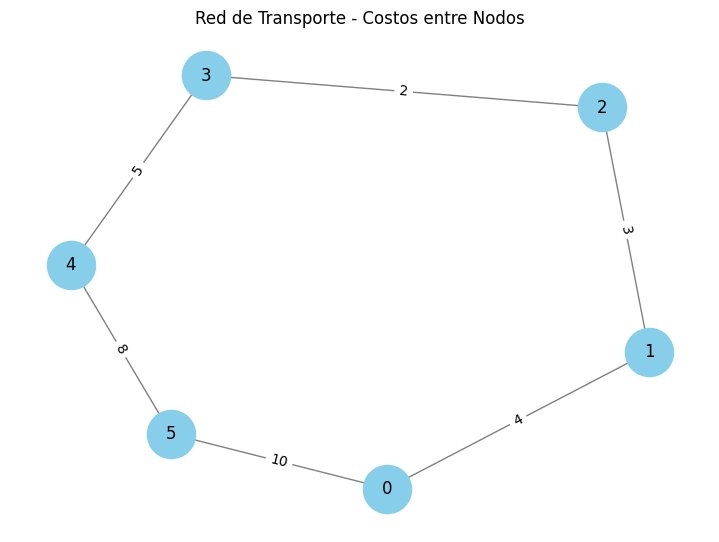

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Red de transporte - Costos
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=12, edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Red de Transporte - Costos entre Nodos")
plt.show()
from google.colab import files
files.download("Figura_1_Red_Costos.png")



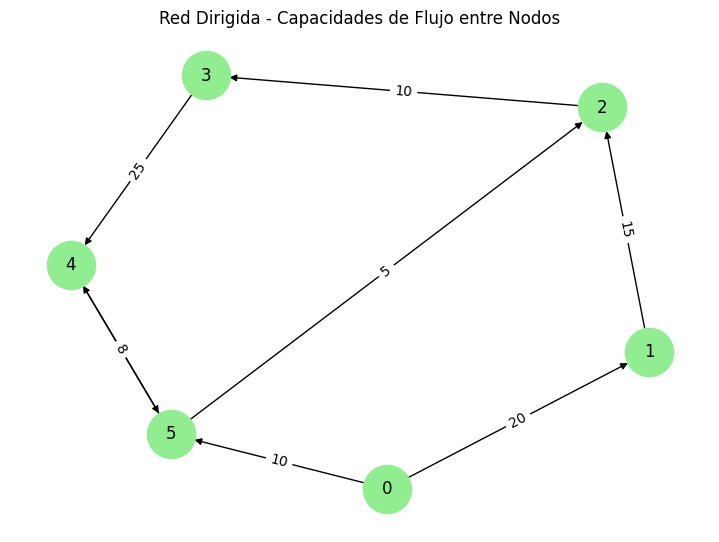

In [37]:
# Red dirigida - Capacidades
plt.figure(figsize=(7,5))
nx.draw(Gf, pos, with_labels=True, node_color='lightgreen', node_size=1200, font_size=12, edge_color='black', arrows=True)
labels_flow = nx.get_edge_attributes(Gf, 'capacity')
nx.draw_networkx_edge_labels(Gf, pos, edge_labels=labels_flow)
plt.title("Red Dirigida - Capacidades de Flujo entre Nodos")
plt.show()


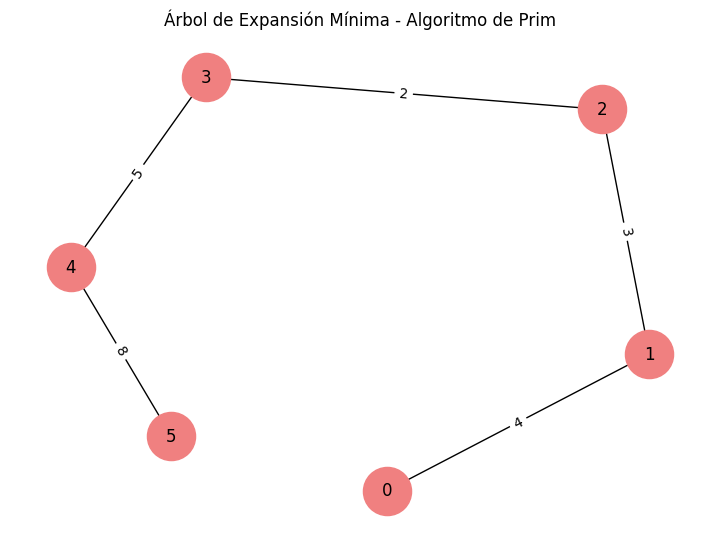

In [38]:
# Árbol de Expansión Mínima - Prim
plt.figure(figsize=(7,5))
nx.draw(mst, pos, with_labels=True, node_color='lightcoral', node_size=1200, font_size=12, edge_color='black')
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels_mst)
plt.title("Árbol de Expansión Mínima - Algoritmo de Prim")
plt.show()


## Referencias

- https://matplotlib.org/gallery.html
- Python for Data Analysis by Wes McKinney (O’Reilly). Copyright 2017 Wes McKinsey, 978-1-491-95766-0.
- https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb